***Plot the probability distributions of the pose of a marker***
Each observation implies a marker position in the world frame, if the nominal robot model is assumed exact. This script calculates the would be pose of the marker from each observation, and plots a curve approximateing an underlying PDF

In [1]:
import pickle
import numpy as np
from parameter_estimator import ParameterEstimator
import utils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import nominal positions of markers
with open('points.p', 'rb') as f:
    pointlist = pickle.load(f)  # deserialize using load()

nominal_locations = {}
nominal_locations_rounded = {}
for i, point in enumerate(np.array(pointlist).T):
    nominal_locations[i+1] = np.concatenate((point[0:3], np.zeros(1), point[3:5]))
    nominal_locations_rounded[i+1] = np.around(nominal_locations[i+1], 4)
#     print(f"{i+1}: {nominal_locations[i+1]}")
#     print(f"{i+1}: {nominal_locations_rounded[i+1]}\n")

    

In [3]:
# import observations from file

# select observations file
observations_file_select = 6
observations_file_str_dict = {1: r'observation_files/obs_2007_gazebo_iiwa_stopping.bag_20230720-135812.p',  # works
                              2: r'observation_files/obs_2007_gazebo_iiwa_stopping.bag_20230720-135812_filtered.p',
                              4: r'observation_files/obs_2007_gazebo_.p',  # works
                              5: r'observation_files/obs_bag_with_lockstep_281023_2023-10-28-14-01-49_20231028-142947.p',
                              6: r'observation_files/obs_single_marker_2023-11-01-11-12-21_20231101-112227.p',
                              9: r'observation_files/observations_simulated_w_error_0mm_0deg_num24020231020_163148.p',
                              10: r'observation_files/observations_simulated_w_error_0.5mm_0.5deg_num24020231020_164948.p',
                              11: r'observation_files/observations_simulated_w_error_5mm_5e-05deg_num24020231027_095006.p',
                              12: r'observation_files/observations_simulated_w_error_7mm_5e-05deg_num24020231027_095120.p',
                              13: r'observation_files/observations_simulated_w_error_1mm_1deg_num24020231027_111510.p',
                              14: r'observation_files/observations_simulated_w_error_1mm_0.1deg_num24020231027_111600.p'}

observations_file = open(observations_file_str_dict[observations_file_select], 'rb')
observations = pickle.load(observations_file)
observations_file.close()
print(observations.keys())

dict_keys([2, 1, 4, 7, 5])


In [22]:
pe = ParameterEstimator()

theta = ParameterEstimator.dhparams["theta_nom"].astype(float)
d = ParameterEstimator.dhparams["d_nom"].astype(float)
r = ParameterEstimator.dhparams["r_nom"].astype(float)
alpha = ParameterEstimator.dhparams["alpha_nom"].astype(float)

marker_id = []

x = []
y = []
z = []
a = []
b = []
c = []

xn = []
yn = []
zn = []
an = []
bn = []
cn = []

dist_errors = []
for marker in observations:
    if marker == 0 or marker>21: continue
    
    print(f'{marker} len: {len(observations[marker])}')
    # print(f'#### MARKER {marker} ####\n')
    for obs in observations[marker]:
        q = np.hstack((np.array(obs["q"]), np.zeros(1)))
        T_CM = pe.T_corr @ utils.H_rvec_tvec(obs["rvec"], obs["tvec"]) @ np.linalg.inv(pe.T_corr)

        # calculate nominal transforms
        T_08 = pe.get_T_jk(0, 8, q, theta, d, r, alpha)

        T_WM = pe.T_W0 @ T_08 @ T_CM
        # utils.roundprint(T_WM)
        rvec, tvec = utils.mat2rvectvec(T_WM)
        dist_error = np.concatenate((tvec-nominal_locations[marker][0:3], rvec-nominal_locations[marker][3:6]))
        if marker == 4:
            print(f"identified (r, t): \n{np.array(rvec)}\t{np.array(tvec)}")
            print(f"true (r, t): \n{np.array(nominal_locations[marker][3:6])}\t{np.array(nominal_locations[marker][0:3])}")
            print("\n")
            dist_errors.append(dist_error)
        marker_id.append(marker)
        x.append(tvec[0])
        y.append(tvec[1])
        z.append(tvec[2])
        a.append(rvec[0])
        b.append(rvec[1])
        c.append(rvec[2])
        
        xn.append(nominal_locations[marker][0])
        yn.append(nominal_locations[marker][1])
        zn.append(nominal_locations[marker][2])
        an.append(nominal_locations[marker][3])
        bn.append(nominal_locations[marker][4])
        cn.append(nominal_locations[marker][5])

        # int(f'{rvec} {tvec}')

2 len: 59
1 len: 27
4 len: 810
identified (r, t): 
[-1.81876748  0.37650424  1.66086505]	[1.20623619 1.51517165 0.51758875]
true (r, t): 
[0.         0.26179939 0.8975979 ]	[1.2044898  1.51038244 0.51763809]


identified (r, t): 
[-1.81854319  0.37560662  1.65622874]	[1.20518747 1.51189797 0.51876142]
true (r, t): 
[0.         0.26179939 0.8975979 ]	[1.2044898  1.51038244 0.51763809]


identified (r, t): 
[-1.82038039  0.37929388  1.65196108]	[1.20582662 1.51237731 0.51832474]
true (r, t): 
[0.         0.26179939 0.8975979 ]	[1.2044898  1.51038244 0.51763809]


identified (r, t): 
[-1.82087578  0.37986698  1.66045814]	[1.20593546 1.51409005 0.51773908]
true (r, t): 
[0.         0.26179939 0.8975979 ]	[1.2044898  1.51038244 0.51763809]


identified (r, t): 
[-1.81948997  0.37742234  1.66104372]	[1.2056782  1.51421973 0.51826127]
true (r, t): 
[0.         0.26179939 0.8975979 ]	[1.2044898  1.51038244 0.51763809]


identified (r, t): 
[-1.81898066  0.3761549   1.65855575]	[1.20507336 1.51

identified (r, t): 
[-1.81948223  0.37900587  1.65927253]	[1.20553971 1.5139701  0.51826086]
true (r, t): 
[0.         0.26179939 0.8975979 ]	[1.2044898  1.51038244 0.51763809]


identified (r, t): 
[-1.81749902  0.37501536  1.65886451]	[1.20436135 1.51106612 0.51893075]
true (r, t): 
[0.         0.26179939 0.8975979 ]	[1.2044898  1.51038244 0.51763809]


identified (r, t): 
[-1.821101    0.3784484   1.65957063]	[1.20529869 1.51349808 0.5178669 ]
true (r, t): 
[0.         0.26179939 0.8975979 ]	[1.2044898  1.51038244 0.51763809]


identified (r, t): 
[-1.81585851  0.37610095  1.66103606]	[1.20485649 1.51329069 0.51822528]
true (r, t): 
[0.         0.26179939 0.8975979 ]	[1.2044898  1.51038244 0.51763809]


identified (r, t): 
[-1.81911532  0.37481438  1.6576136 ]	[1.20409621 1.51251753 0.51901902]
true (r, t): 
[0.         0.26179939 0.8975979 ]	[1.2044898  1.51038244 0.51763809]


identified (r, t): 
[-1.81882454  0.37978628  1.65970264]	[1.20479207 1.51398016 0.51831127]
true (r, t):

identified (r, t): 
[-1.81594561  0.37499046  1.65859979]	[1.20525448 1.51483154 0.51853724]
true (r, t): 
[0.         0.26179939 0.8975979 ]	[1.2044898  1.51038244 0.51763809]


identified (r, t): 
[-1.81748427  0.37731396  1.65924263]	[1.20612494 1.51604625 0.51825377]
true (r, t): 
[0.         0.26179939 0.8975979 ]	[1.2044898  1.51038244 0.51763809]


identified (r, t): 
[-1.82044443  0.37489923  1.65844675]	[1.20646548 1.51596262 0.51818208]
true (r, t): 
[0.         0.26179939 0.8975979 ]	[1.2044898  1.51038244 0.51763809]


identified (r, t): 
[-1.81572679  0.37117546  1.65755109]	[1.20472891 1.51323698 0.51855674]
true (r, t): 
[0.         0.26179939 0.8975979 ]	[1.2044898  1.51038244 0.51763809]


identified (r, t): 
[-1.81697623  0.38176315  1.65973241]	[1.20654668 1.5173217  0.51758144]
true (r, t): 
[0.         0.26179939 0.8975979 ]	[1.2044898  1.51038244 0.51763809]


identified (r, t): 
[-1.81660147  0.37345894  1.65651783]	[1.20559915 1.51467402 0.51844383]
true (r, t):

In [24]:
print(-1.82108515+np.pi)
print(1.66113848-np.pi)

1.320507503589793
-1.4804541735897931


(array([  2.,   8.,  15.,  46., 113., 218., 187., 148.,  63.,  10.]),
 array([-1.82510199, -1.8240132 , -1.8229244 , -1.82183561, -1.82074682,
        -1.81965802, -1.81856923, -1.81748043, -1.81639164, -1.81530285,
        -1.81421405]),
 <BarContainer object of 10 artists>)

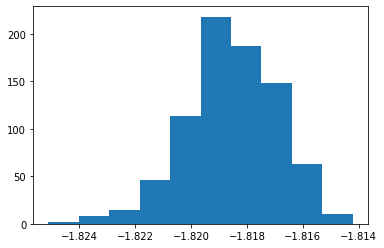

In [5]:
dist_errors= np.array(dist_errors)
plt.hist(dist_errors[:,3])

In [6]:
df = pd.DataFrame()
df['x'] = x
df['y'] = y
df['z'] = z
df['a'] = a
df['b'] = b
df['c'] = c
df['marker_id'] = marker_id
df['xn'] = xn
df['yn'] = yn
df['zn'] = zn
df['an'] = an
df['bn'] = bn
df['cn'] = cn

In [7]:
sns.set()

In [23]:
# for marker in observations:
#     for pos_coordinate in ['x', 'y', 'z']:
#         sns.displot(df[df['marker_id']==marker], x=pos_coordinate, kind="kde")
        
# axvlines don't work well with the plot type used by seaborn
#plt.axvline(x=nominal_locations[3][0])
#plt.axvline(x=nominal_locations_rounded[3][0])

In [9]:
# print the standar deviation for all coordinates
for m in set(marker_id):
    print(f'marker {m}:')
    print(df[df['marker_id']==m].std())
    print('\n')

marker 1:
x            3.561790e-02
y            7.496689e-04
z            1.123683e-02
a            2.237041e-03
b            4.198820e-03
c            4.388942e-03
marker_id    0.000000e+00
xn           4.525488e-16
yn           0.000000e+00
zn           0.000000e+00
an           0.000000e+00
bn           0.000000e+00
cn           0.000000e+00
dtype: float64


marker 2:
x            1.277598e-02
y            5.309579e-04
z            1.470415e-03
a            1.446044e-03
b            3.273957e-03
c            2.705976e-03
marker_id    0.000000e+00
xn           0.000000e+00
yn           0.000000e+00
zn           2.239506e-16
an           0.000000e+00
bn           1.119753e-16
cn           0.000000e+00
dtype: float64


marker 4:
x            2.849899e-03
y            4.464626e-03
z            1.737672e-03
a            1.647048e-03
b            2.924964e-03
c            2.288306e-03
marker_id    0.000000e+00
xn           2.221818e-16
yn           0.000000e+00
zn           0.000000e+00


In [10]:
import utils

mat = np.array([  0.5235515, -0.7380293,  0.4256837,
   0.8517128,  0.4405338, -0.2837520,
   0.0218892,  0.5111191,  0.8592312 ])
mat = mat.reshape(3,3)

In [15]:
transformation_matrix = utils.toHomogeneous(mat, np.array([1,2,3]))
print(transformation_matrix)

[[ 0.5235515 -0.7380293  0.4256837  1.       ]
 [ 0.8517128  0.4405338 -0.283752   2.       ]
 [ 0.0218892  0.5111191  0.8592312  3.       ]
 [ 0.         0.         0.         1.       ]]


In [18]:
rvec1, tvec1 = utils.mat2rvectvec(transformation_matrix)

In [20]:
tm = utils.H_rvec_tvec(rvec1,tvec1)

In [21]:
tm-transformation_matrix

array([[-3.42192674e-08,  7.00354841e-09,  1.51665593e-08,
         0.00000000e+00],
       [ 1.83381128e-08,  4.51805404e-08, -1.55505449e-08,
         0.00000000e+00],
       [ 1.55500246e-08, -3.95751264e-08, -5.04756132e-08,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])